In [2]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import pickle
plt.style.use("default")

df = pd.read_csv("archive/Plant2_summed_dataset.csv")
df["DATE_TIME"] = df["DATE_TIME"].apply(pd.to_datetime)
ts = TimeSeriesSplit(n_splits = 7)

y = df["AC_POWER"]
X = df.drop(["AC_POWER", "DATE_TIME"], axis=1).loc[:, ["IRRADIATION", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=6/34)
with open("data_imputed.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)
    

In [8]:
from sklearn.model_selection import GridSearchCV
import time

params = {
    "activation": ["identity", "logistic", "tanh", "relu"],
    "hidden_layer_sizes": [(5,), (25,), (100,)],
}

#grid = GridSearchCV(MLPRegressor(max_iter=1000000), param_grid=params, n_jobs=-1, verbose=3, cv=TimeSeriesSplit(n_splits = 2), return_train_score=True)
#nn = MLPRegressor(max_iter=100000000, activation="tanh", hidden_layer_sizes=(10,))
#nn.fit(X_train, y_train)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, shuffle=False, test_size=1/7)
layers_conf = ["(50,)", "(100,)", "(50,50)", "(100,100)",]
print("Activation function & Layers & Train score & Validation score & Test score & Time\\\\")

for af in ["relu"]:
    for li, layers in enumerate([(5,10,20,50,80,40,20,5)]):
        start = time.time()
        reg = MLPRegressor(max_iter=1000000, hidden_layer_sizes=layers, activation=af, random_state=42)
        reg.fit(X_train_2, y_train_2)
        end = time.time()
        print(af, end=" & ")
        print(layers_conf[li], end=" & ")
        print(round(reg.score(X_train, y_train)*100, 2), end=" & ")
        print(round(reg.score(X_test_2, y_test_2)*100, 2), end=" & ")
        print(round(reg.score(X_test, y_test)*100, 2), end=" & ")
        print(str(round((end - start)/60)), end="\\\\")
        print("")

Activation function & Layers & Train score & Validation score & Test score & Time\\
relu & (50,) & 85.37 & 84.43 & 77.39 & 7\\


In [5]:
nn = MLPRegressor(max_iter=1000000, hidden_layer_sizes=(50,), activation="relu", random_state=42)
nn.fit(X_train, y_train)
print(nn.score(X_train, y_train))
print(nn.score(X_test, y_test))

0.9417003690987904
0.9222363163369522


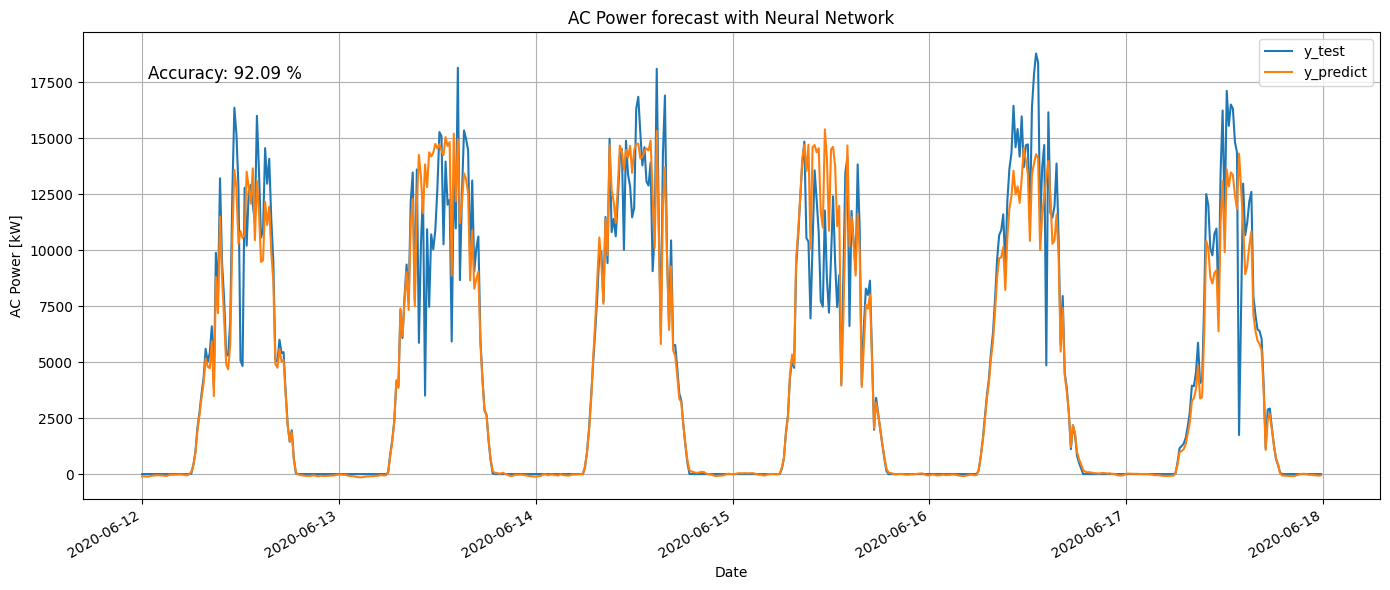

In [7]:

plt.figure(figsize=(14,6))
plt.grid()
plt.plot((df['DATE_TIME'])[len(y_train):],y_test.to_numpy()) #TEST DATA
plt.plot((df['DATE_TIME'])[len(y_train):],nn.predict(X_test)) #PREDICTION OF y_test
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date')
plt.ylabel('AC Power [kW]')
plt.legend(['y_test','y_predict'])
plt.title('AC Power forecast with Neural Network')
plt.text(0.05, 0.9, 'Accuracy: 92.09 %', fontsize = 12, transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig("forecast_nn.pdf")
plt.show()